In [11]:
from sklearn.tree import DecisionTreeClassifier, export_text
import pandas as pd


In [12]:
data = {
    'High School GPA': [3.8, 3.2, 4.0, 2.5, 3.6],
    'SAT Score': [1450, 1300, 1500, 1200, 1400],
    'Extracurricular Activities': ['Yes', 'No', 'Yes', 'Yes', 'No'],
    'Recommendation Letter Strength': ['Strong', 'Weak', 'Strong', 'Weak', 'Strong'],
    'Admission Status': ['Admitted', 'Not Admitted', 'Admitted', 'Not Admitted', 'Admitted']
}
df = pd.DataFrame(data)

In [13]:
# Convert categorical variables to numerical
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df['Recommendation Letter Strength'] = df['Recommendation Letter Strength'].map({'Strong': 1, 'Weak': 0})


In [14]:
# Split features and target variable
X = df.drop('Admission Status', axis=1)
y = df['Admission Status']

In [22]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [27]:
tree_rules= export_text(dt, feature_names=list(X.columns))
print(tree_rules)

|--- Recommendation Letter Strength <= 0.50
|   |--- class: Not Admitted
|--- Recommendation Letter Strength >  0.50
|   |--- class: Admitted



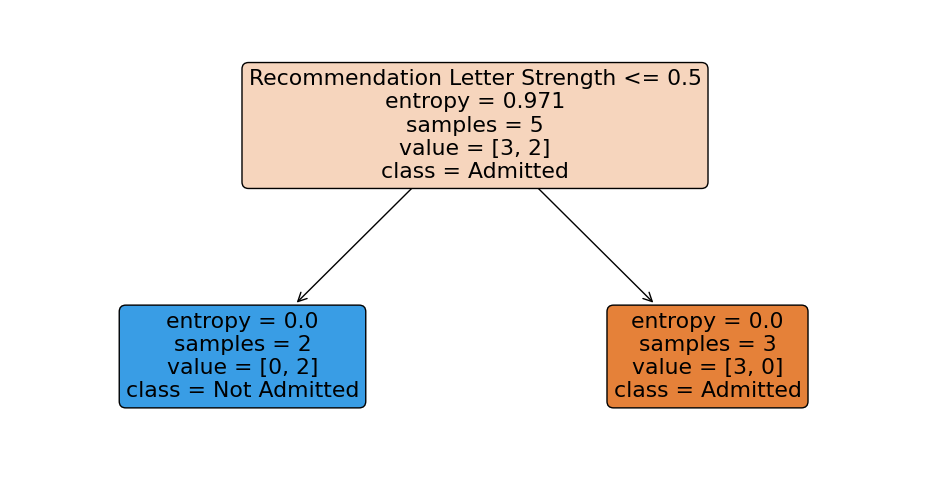

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plot_tree(dt, feature_names=list(X.columns), class_names=dt.classes_, filled=True, rounded=True)
plt.show()